# Credit Card Dataset for Clustering

In [2]:
import pandas as pd
import zipfile

# Define the path to the zip file
zip_file_path = 'Credit Card Dataset for Clustering.zip'

# Step 1: Extract the CSV file from the zip folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files to the current directory
    zip_ref.extractall()
    # List the files in the zip file to understand what we have
    extracted_files = zip_ref.namelist()

# Assuming there's a single CSV file inside the zip
csv_file_name = 'CC GENERAL.csv'

# Load the CSV data into a pandas DataFrame
df = pd.read_csv(csv_file_name)

# Display the first few rows to verify that the data is loaded properly
print(df.head())
print("\nDataset Information:")
print(df.info())
print(df.describe())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [ ]:
# Data Preparation

In [4]:
# Handling missing values
# Impute missing values in CREDIT_LIMIT with median
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

# Impute missing values in MINIMUM_PAYMENTS with median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

# Verify if there are any missing values left
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [6]:
# Drop duplicates if there are any
df.drop_duplicates(inplace=True)

# Verify the data types
print("\nData Types after handling missing values and duplicates:")
print(df.dtypes)


Data Types after handling missing values and duplicates:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


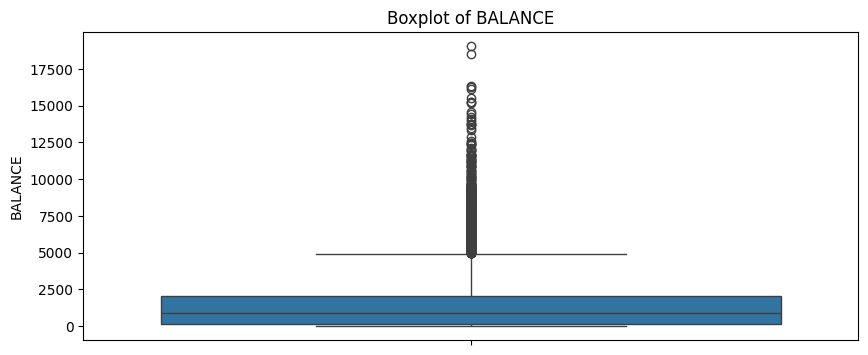

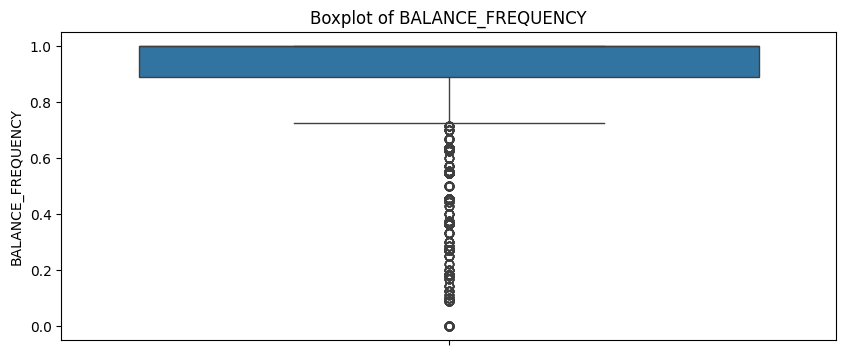

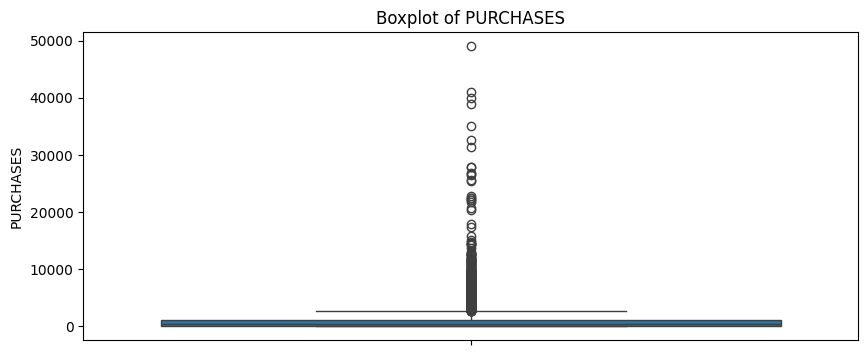

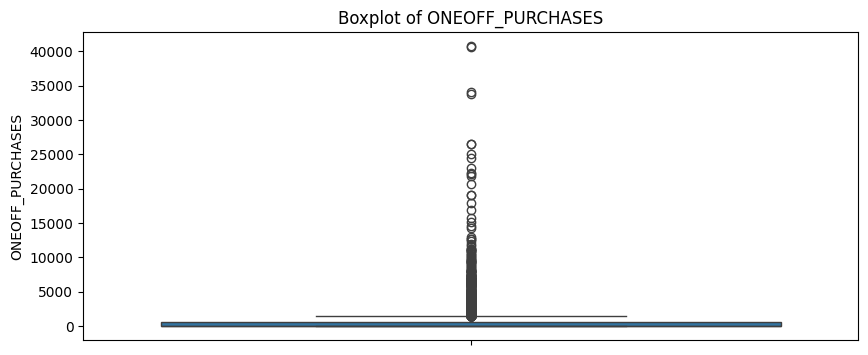

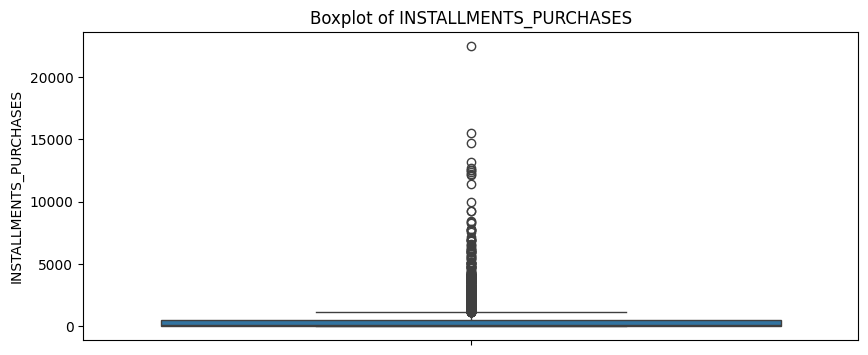

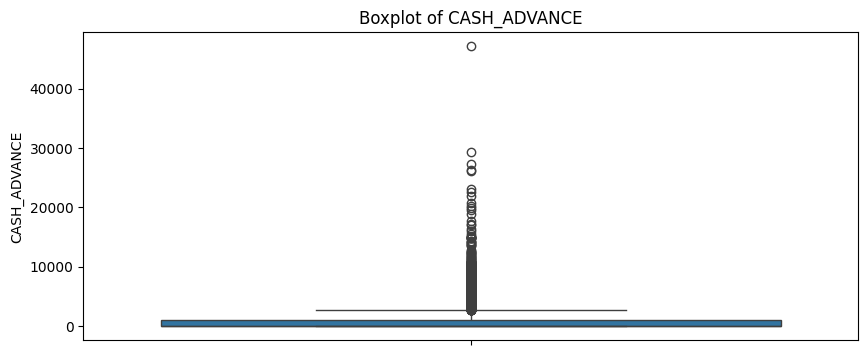

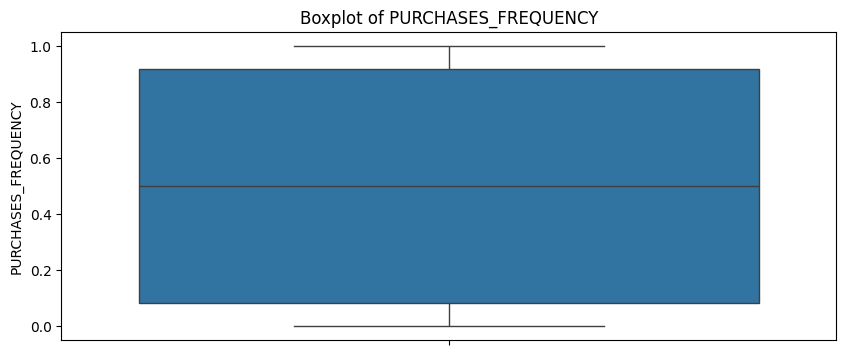

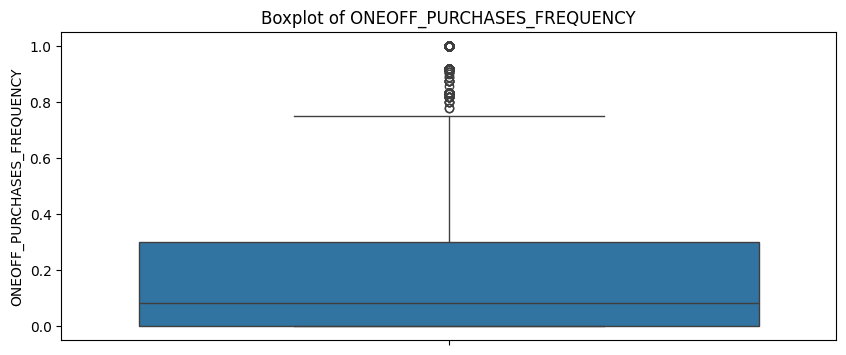

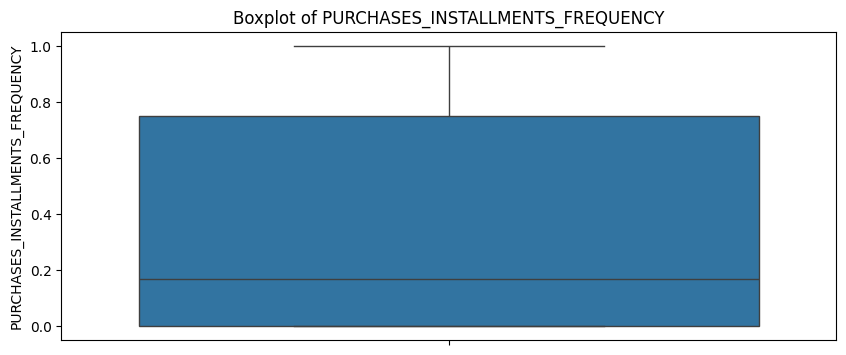

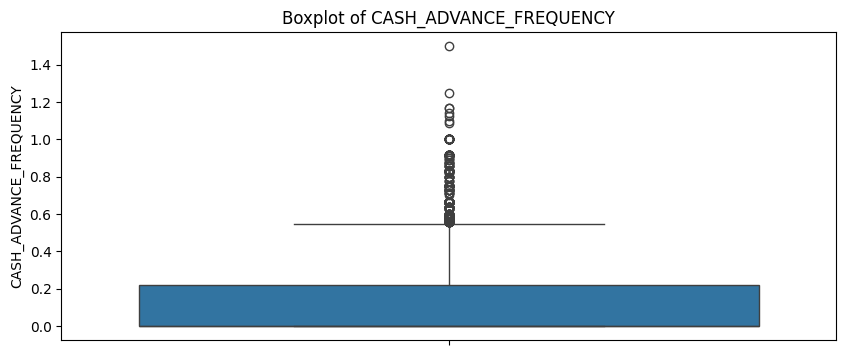

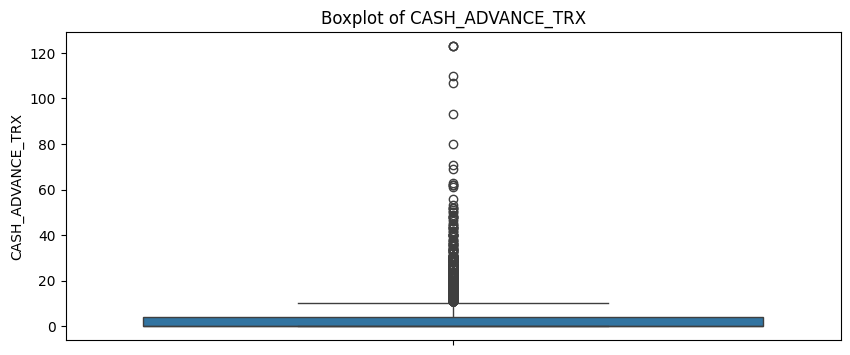

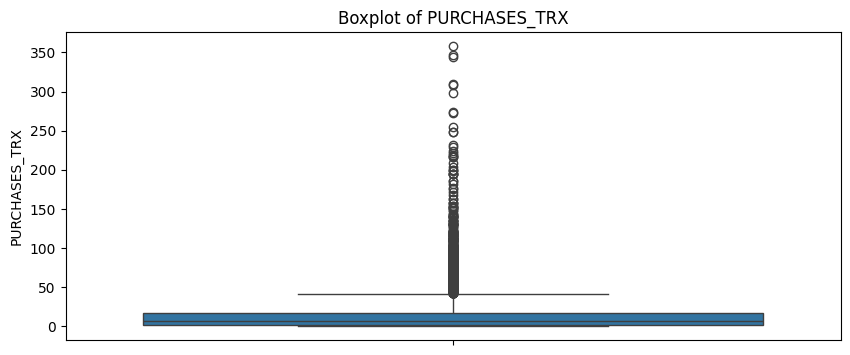

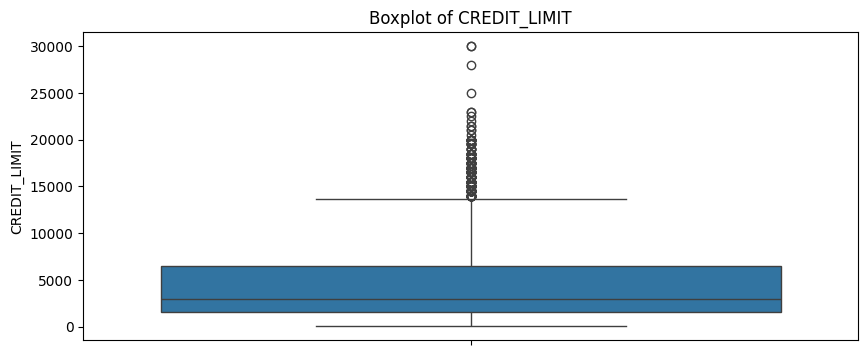

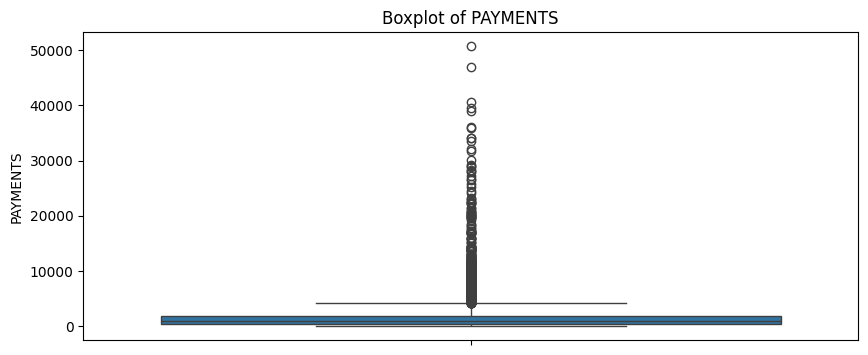

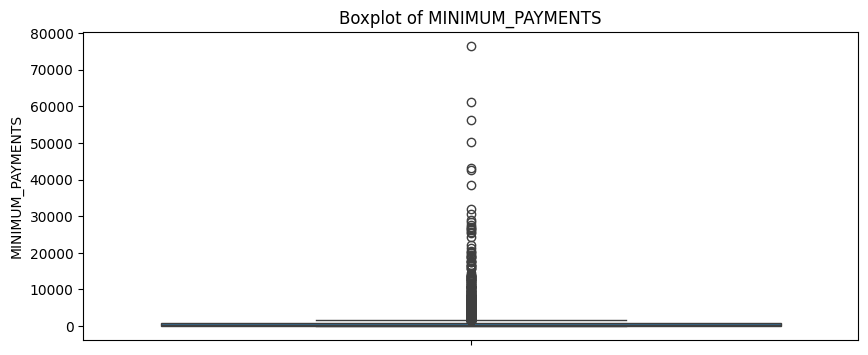

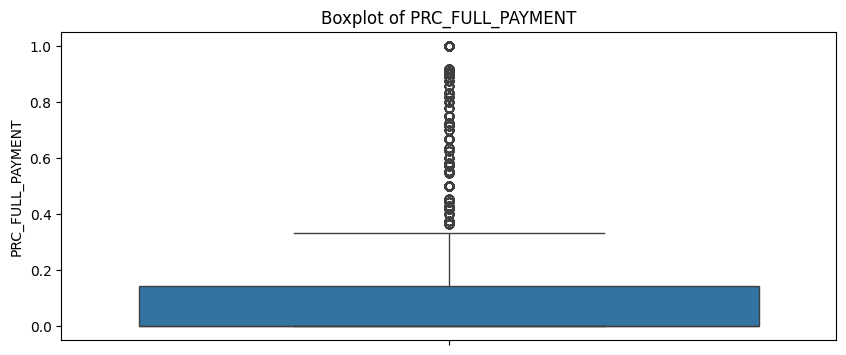

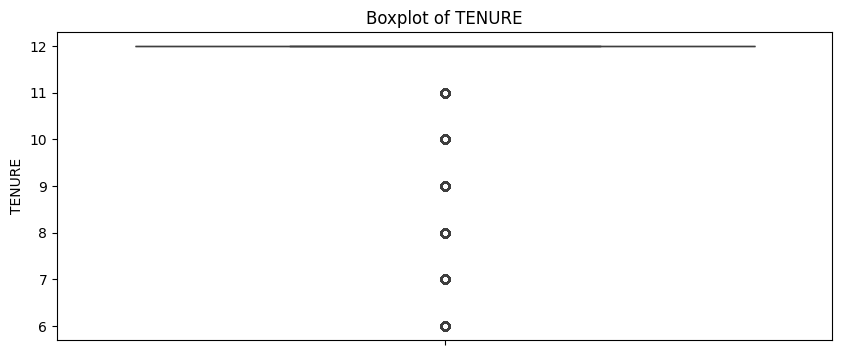

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots to visualize outliers for numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [10]:
# Create new features
# Monthly Average Purchase
df['MONTHLY_AVG_PURCHASE'] = df['PURCHASES'] / df['TENURE']

# Credit Utilization Ratio (how much of the credit limit the customer is using)
df['CREDIT_UTILIZATION'] = df['BALANCE'] / df['CREDIT_LIMIT']

# Payment to Minimum Payment Ratio
df['PAYMENT_MIN_PAYMENT_RATIO'] = df['PAYMENTS'] / (df['MINIMUM_PAYMENTS'] + 1e-5)  # Add small value to avoid division by zero

# Display the first few rows with the new features
print("\nDataset with new features:")
print(df.head())


Dataset with new features:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.083333  ...  

In [12]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
columns_to_scale = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 
                    'PAYMENTS', 'MINIMUM_PAYMENTS', 'MONTHLY_AVG_PURCHASE', 
                    'CREDIT_UTILIZATION', 'PAYMENT_MIN_PAYMENT_RATIO']

# Apply StandardScaler to normalize the selected columns
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

# Display scaled data
print("\nDataset after scaling:")
print(df_scaled.head())


Dataset after scaling:
  CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001 -0.731989           0.818182  -0.424900              0.00   
1  C10002  0.786961           0.909091  -0.469552              0.00   
2  C10003  0.447135           1.000000  -0.107668            773.17   
3  C10004  0.049099           0.636364   0.232058           1499.00   
4  C10005 -0.358775           1.000000  -0.462063             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4     -0.466786             0.166667   
1                     0.0      2.605605             0.000000   
2                     0.0     -0.466786             1.000000   
3                     0.0     -0.368653             0.083333   
4                     0.0     -0.466786             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.083333  ...   
1                   

In [ ]:
#  Exploratory Data Analysis (EDA)

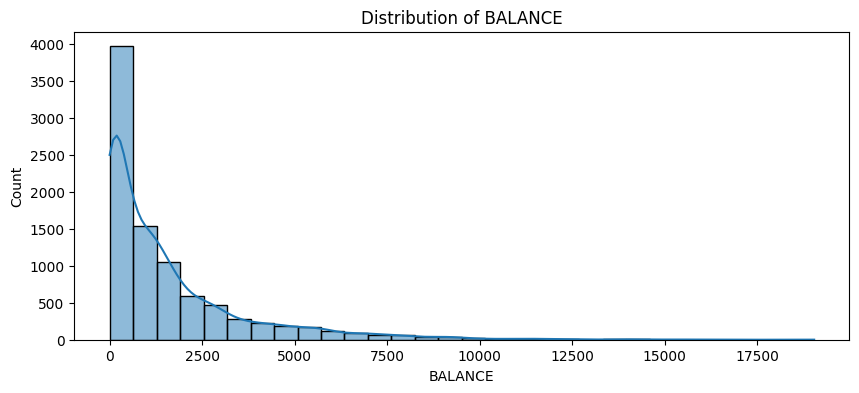

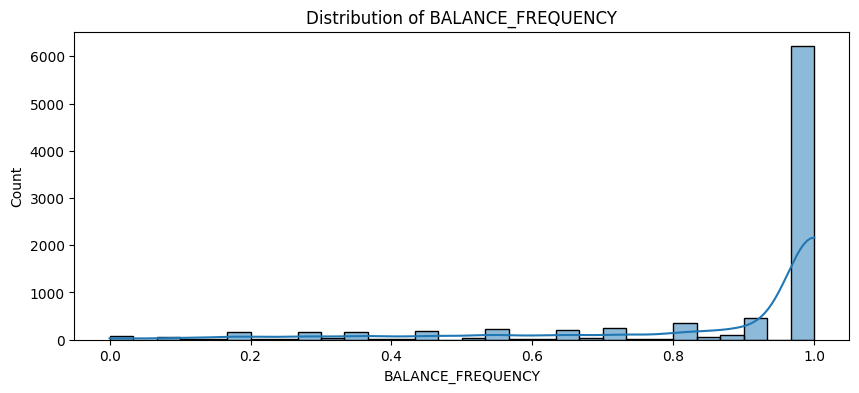

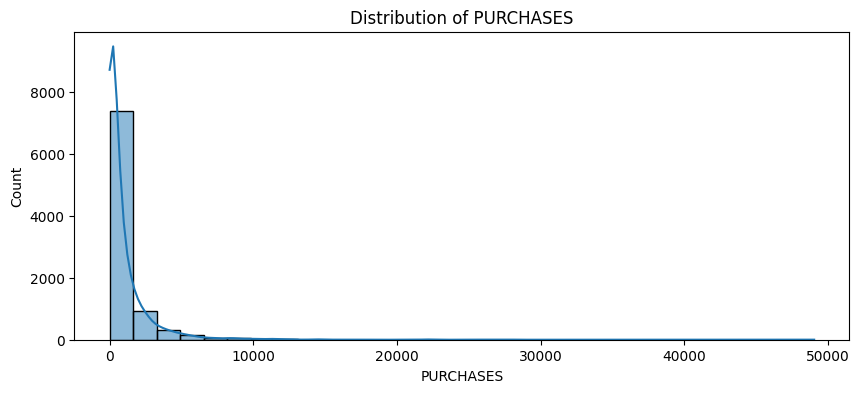

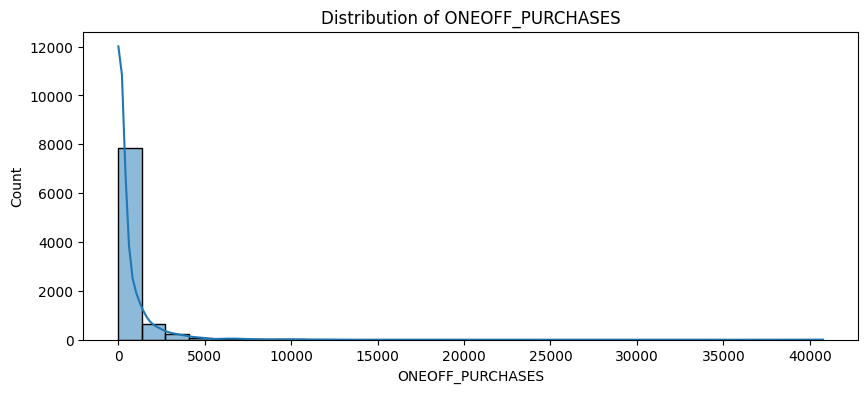

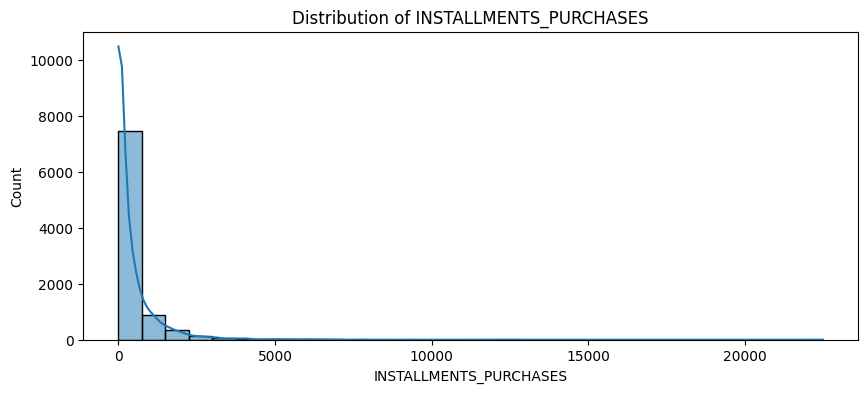

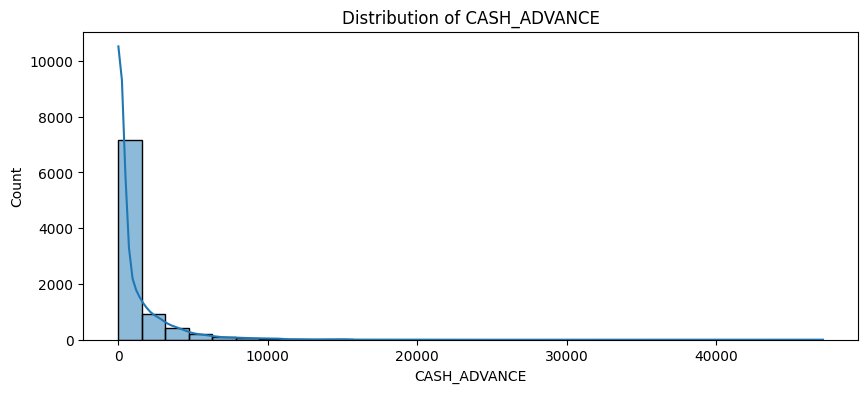

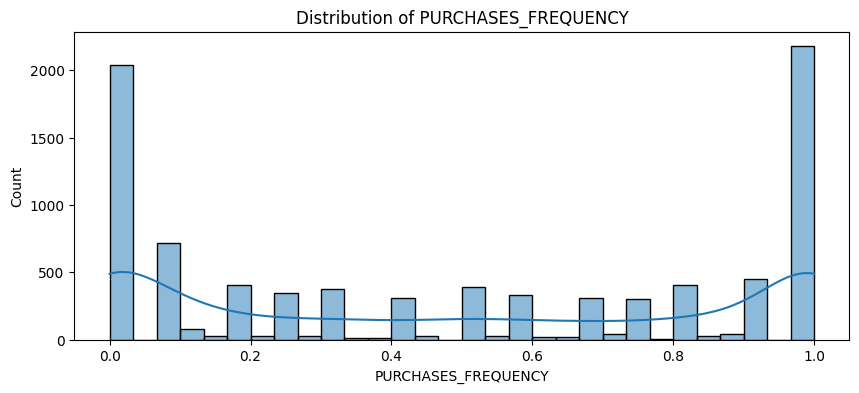

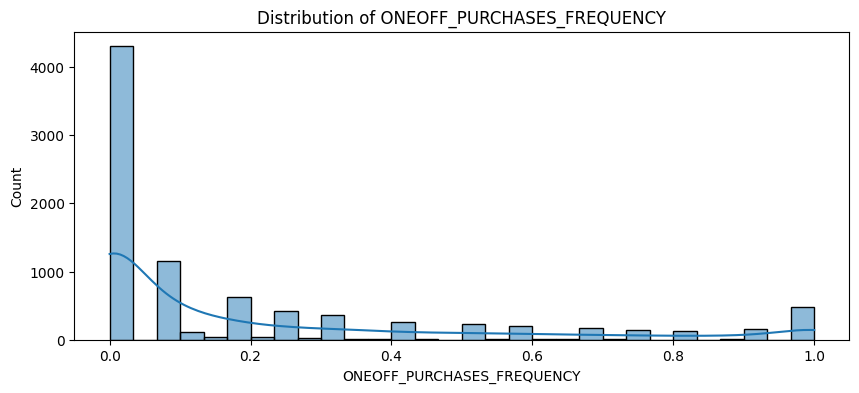

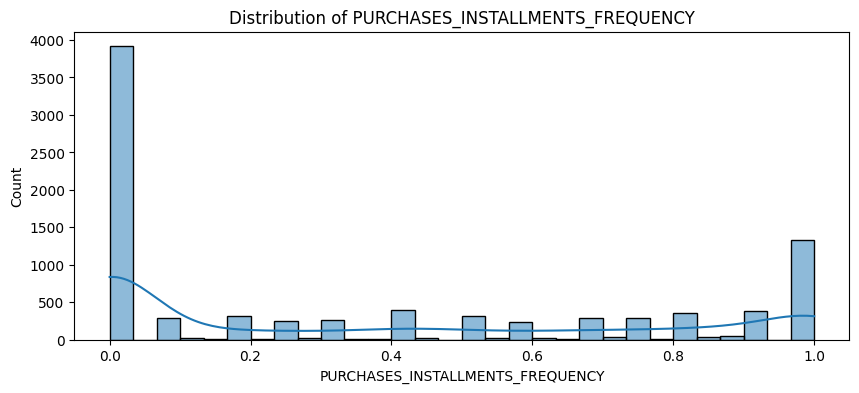

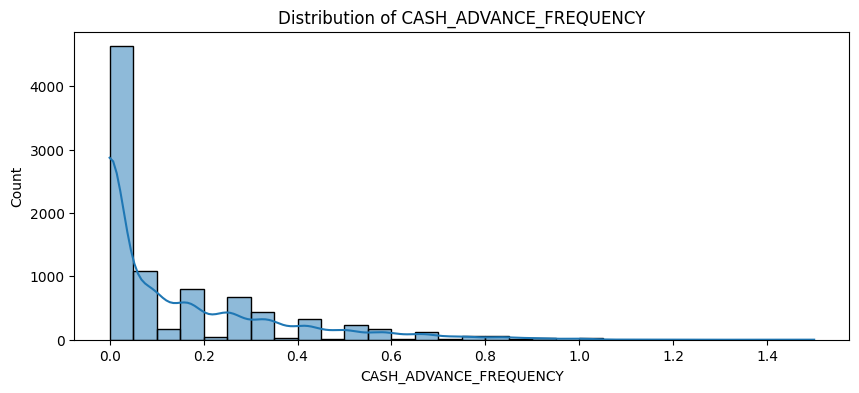

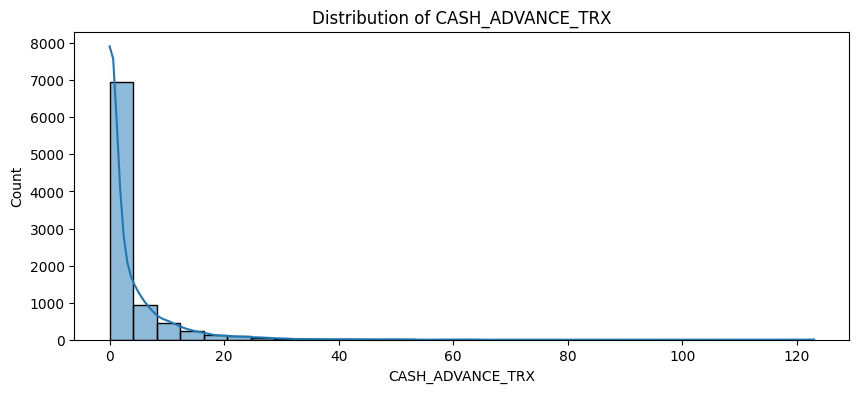

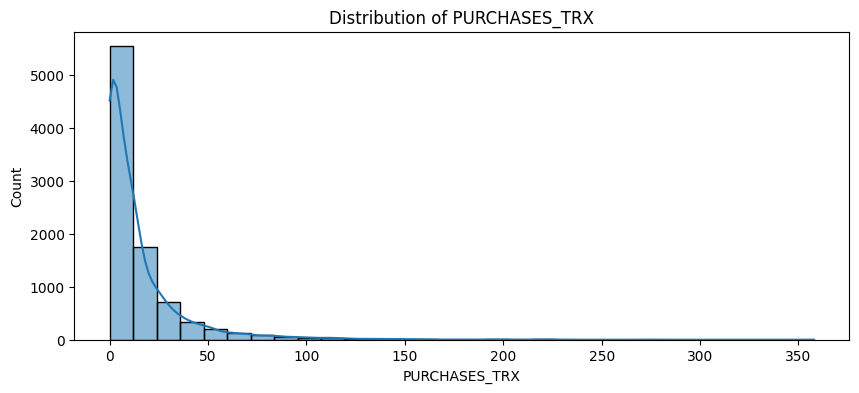

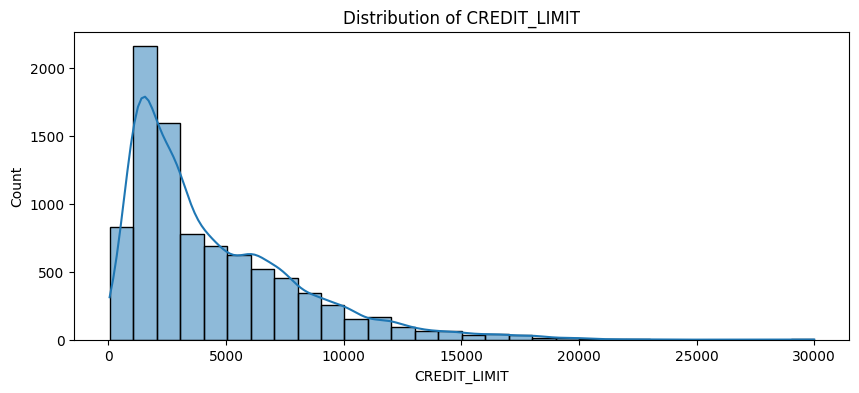

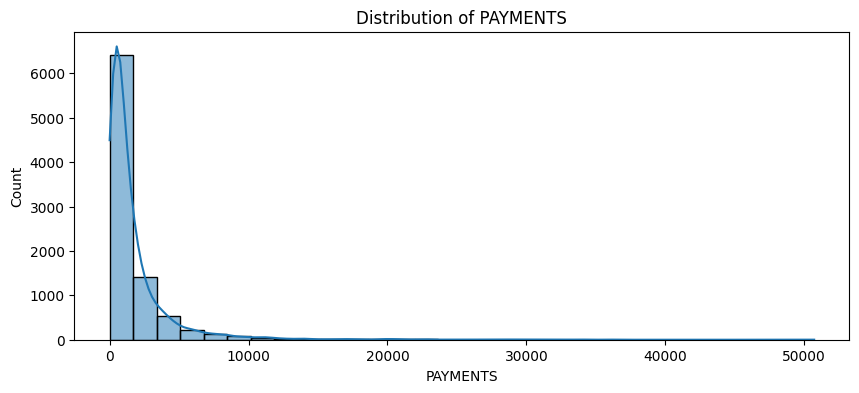

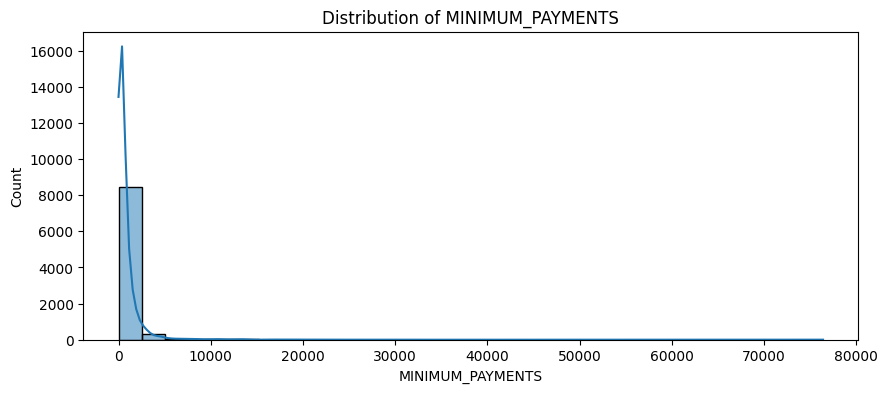

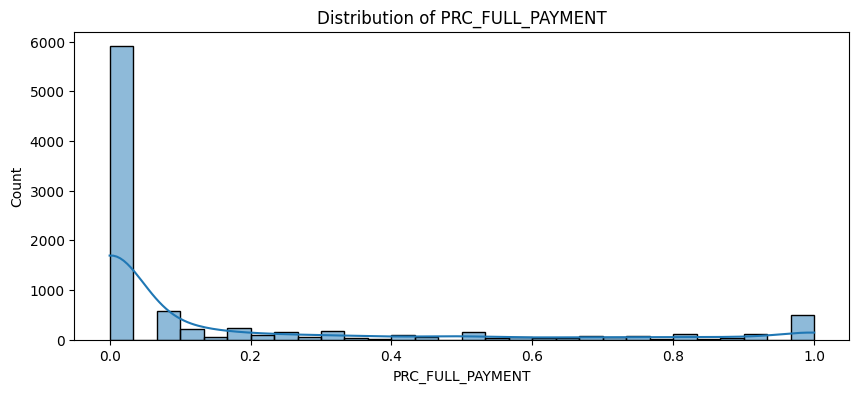

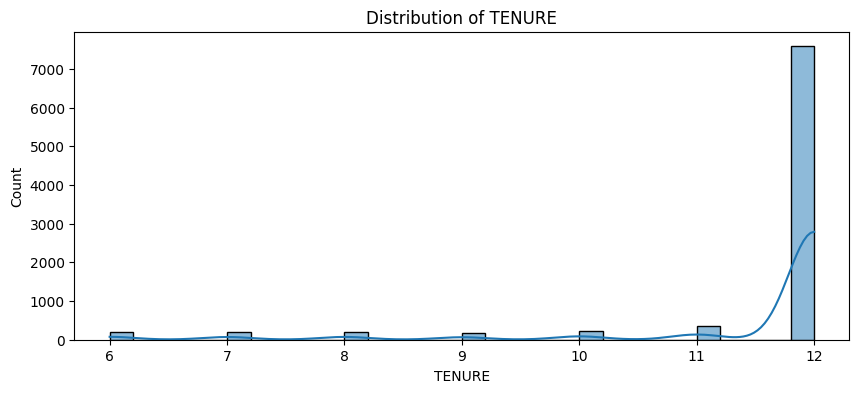

In [14]:
# Univariate analysis
# Plot histograms for key numerical features
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

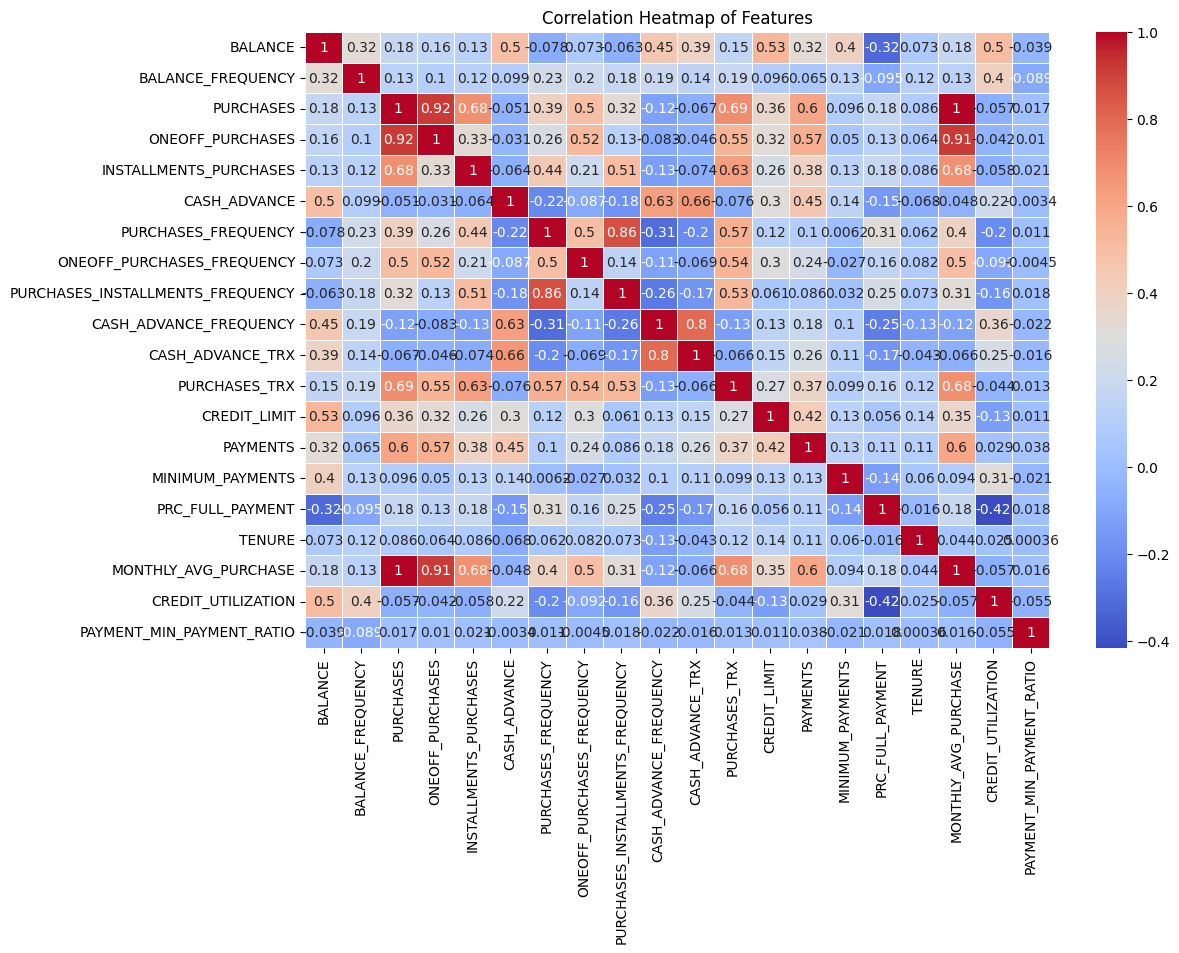

In [18]:
# Correlation heatmap

# Select only numeric columns from the scaled DataFrame for correlation
numeric_columns = df_scaled.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
# Insights Extraction and Spending Pattern Analysis

In [20]:
# 1.1 Identify Key Customer Segments

# Define segments based on spending
high_spenders_threshold = df['PURCHASES'].quantile(0.75)
low_spenders_threshold = df['PURCHASES'].quantile(0.25)

df['Spending_Segment'] = df['PURCHASES'].apply(
    lambda x: 'High Spender' if x >= high_spenders_threshold else (
        'Low Spender' if x <= low_spenders_threshold else 'Medium Spender')
)

# Define segments based on purchase frequency
df['Frequency_Segment'] = df['PURCHASES_FREQUENCY'].apply(
    lambda x: 'Frequent User' if x > 0.7 else (
        'Occasional User' if x < 0.3 else 'Moderate User')
)

# Define segments based on payment habits
df['Payment_Segment'] = df['PRC_FULL_PAYMENT'].apply(
    lambda x: 'Full Payer' if x > 0.75 else (
        'Minimum Payer' if x < 0.25 else 'Partial Payer')
)

# Display segmentation summary
print("\nSegmentation Summary:")
print(df[['Spending_Segment', 'Frequency_Segment', 'Payment_Segment']].value_counts())


Segmentation Summary:
Spending_Segment  Frequency_Segment  Payment_Segment
Low Spender       Occasional User    Minimum Payer      2089
Medium Spender    Occasional User    Minimum Payer      1214
                  Frequent User      Minimum Payer      1132
High Spender      Frequent User      Minimum Payer      1122
Medium Spender    Moderate User      Minimum Payer      1100
                  Frequent User      Partial Payer       342
High Spender      Frequent User      Full Payer          307
                                     Partial Payer       297
                  Moderate User      Minimum Payer       295
Medium Spender    Frequent User      Full Payer          226
                  Moderate User      Partial Payer       218
                                     Full Payer          123
High Spender      Occasional User    Minimum Payer       117
Low Spender       Occasional User    Partial Payer        98
Medium Spender    Occasional User    Partial Payer        69
High Spen

C:\Users\milto\AppData\Local\Temp\ipykernel_15532\3130729255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Spending_Segment', data=df, palette='viridis')


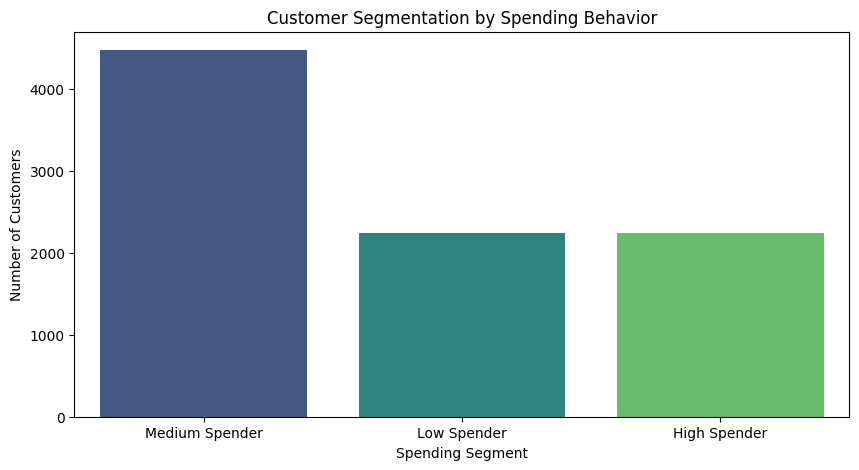

C:\Users\milto\AppData\Local\Temp\ipykernel_15532\3130729255.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Frequency_Segment', data=df, palette='coolwarm')


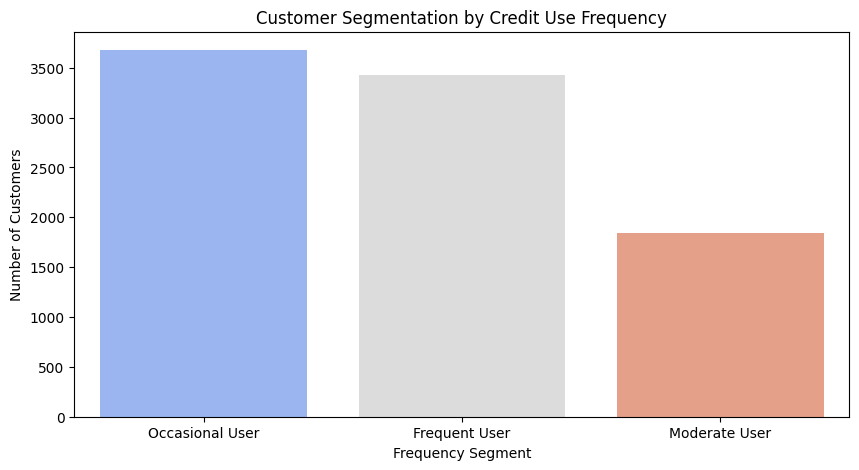

C:\Users\milto\AppData\Local\Temp\ipykernel_15532\3130729255.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment_Segment', data=df, palette='Blues')


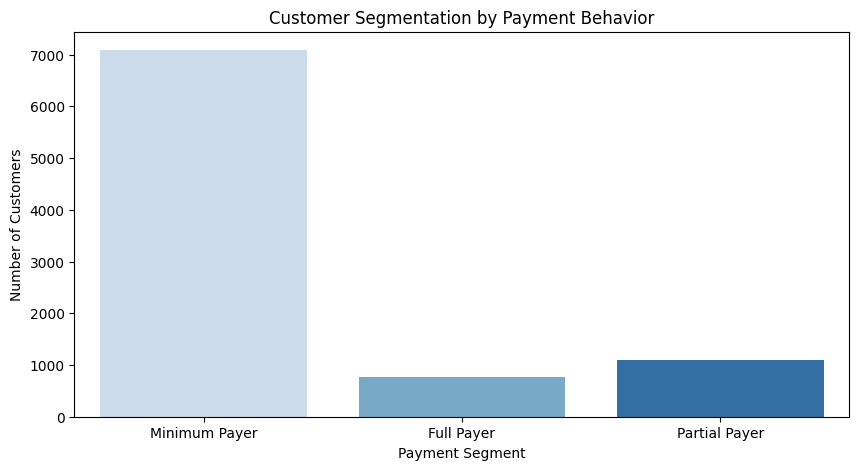

In [22]:
# Plot Spending Segments
plt.figure(figsize=(10, 5))
sns.countplot(x='Spending_Segment', data=df, palette='viridis')
plt.title('Customer Segmentation by Spending Behavior')
plt.xlabel('Spending Segment')
plt.ylabel('Number of Customers')
plt.show()

# Plot Frequency Segments
plt.figure(figsize=(10, 5))
sns.countplot(x='Frequency_Segment', data=df, palette='coolwarm')
plt.title('Customer Segmentation by Credit Use Frequency')
plt.xlabel('Frequency Segment')
plt.ylabel('Number of Customers')
plt.show()

# Plot Payment Segments
plt.figure(figsize=(10, 5))
sns.countplot(x='Payment_Segment', data=df, palette='Blues')
plt.title('Customer Segmentation by Payment Behavior')
plt.xlabel('Payment Segment')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
# Summarize Patterns and Insights

In [24]:
# Group by Spending Segment and get descriptive statistics
spending_summary = df.groupby('Spending_Segment').agg({
    'BALANCE': ['mean', 'median'],
    'PURCHASES': ['mean', 'median'],
    'PAYMENTS': ['mean', 'median'],
    'CREDIT_LIMIT': ['mean', 'median']
}).reset_index()

print("\nSummary of Spending Patterns:")
print(spending_summary)

# Group by Frequency Segment and get descriptive statistics
frequency_summary = df.groupby('Frequency_Segment').agg({
    'PURCHASES_TRX': ['mean', 'median'],
    'CASH_ADVANCE': ['mean', 'median'],
    'CASH_ADVANCE_FREQUENCY': ['mean']
}).reset_index()

print("\nSummary of Frequency Patterns:")
print(frequency_summary)

# Group by Payment Segment and get descriptive statistics
payment_summary = df.groupby('Payment_Segment').agg({
    'MINIMUM_PAYMENTS': ['mean', 'median'],
    'PAYMENTS': ['mean', 'median'],
    'BALANCE': ['mean', 'median'],
    'PRC_FULL_PAYMENT': ['mean']
}).reset_index()

print("\nSummary of Payment Patterns:")
print(payment_summary)


Summary of Spending Patterns:
  Spending_Segment      BALANCE                 PURCHASES           \
                           mean       median         mean   median   
0     High Spender  1954.500783   982.312539  3157.548637  2160.45   
1      Low Spender  2055.778318  1382.239488     2.028119     0.00   
2   Medium Spender  1123.613116   387.306051   426.363540   361.28   

      PAYMENTS              CREDIT_LIMIT          
          mean       median         mean  median  
0  3288.525904  2073.246179  6351.806492  6000.0  
1  1609.940612   715.039460  4019.602865  3000.0  
2  1016.734334   573.918877  3802.551182  2700.0  

Summary of Frequency Patterns:
  Frequency_Segment PURCHASES_TRX        CASH_ADVANCE              \
                             mean median         mean      median   
0     Frequent User     31.573594   21.0   571.250700    0.000000   
1     Moderate User     10.321390    8.0   711.063873    0.000000   
2   Occasional User      1.172695    0.0  1493.379291  

In [ ]:
# Clustering and Predictive Analysis Preparation

In [26]:
# 1.2 Scaling the Data

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Feature selection: Selecting relevant features for clustering
features_for_clustering = df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 
                              'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                              'PAYMENTS', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']]

# Handling missing values by imputing with the median
features_for_clustering.fillna(features_for_clustering.median(), inplace=True)

# Standardize the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Convert scaled features back to a DataFrame for easy handling
df_scaled = pd.DataFrame(scaled_features, columns=features_for_clustering.columns)

print("\nScaled Features:")
print(df_scaled.head())


Scaled Features:
    BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0 -0.731989  -0.424900         -0.356934               -0.349079   
1  0.786961  -0.469552         -0.356934               -0.454576   
2  0.447135  -0.107668          0.108889               -0.454576   
3  0.049099   0.232058          0.546189               -0.454576   
4 -0.358775  -0.462063         -0.347294               -0.454576   

   CASH_ADVANCE  PAYMENTS  CREDIT_LIMIT  PRC_FULL_PAYMENT  
0     -0.466786 -0.528979     -0.960378         -0.525551  
1      2.605605  0.818642      0.688678          0.234227  
2     -0.466786 -0.383805      0.826100         -0.525551  
3     -0.368653 -0.598688      0.826100         -0.525551  
4     -0.466786 -0.364368     -0.905410         -0.525551  


C:\Users\milto\AppData\Local\Temp\ipykernel_15532\1184145801.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_for_clustering.fillna(features_for_clustering.median(), inplace=True)


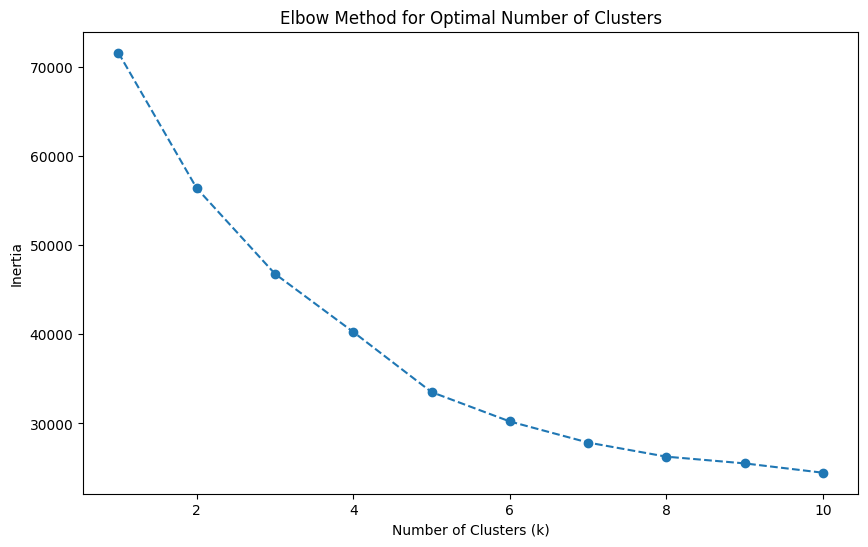


Cluster Assignments:
Cluster
1    6895
0    1203
3     827
2      25
Name: count, dtype: int64


In [28]:
# 2.1 Apply K-Means Clustering

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 2.1: Determine the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)  # We will test from 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# From the Elbow plot, choose the number of clusters where the "elbow" occurs
optimal_k = 4  # You may need to adjust this based on the elbow method output

# Step 2.2: Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

print("\nCluster Assignments:")
print(df_scaled['Cluster'].value_counts())


C:\Users\milto\AppData\Local\Temp\ipykernel_15532\2680238050.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


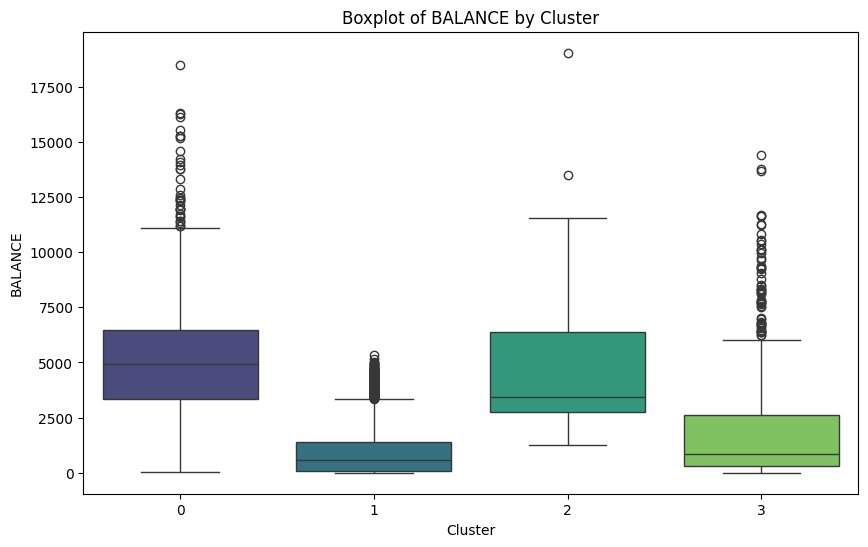

C:\Users\milto\AppData\Local\Temp\ipykernel_15532\2680238050.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


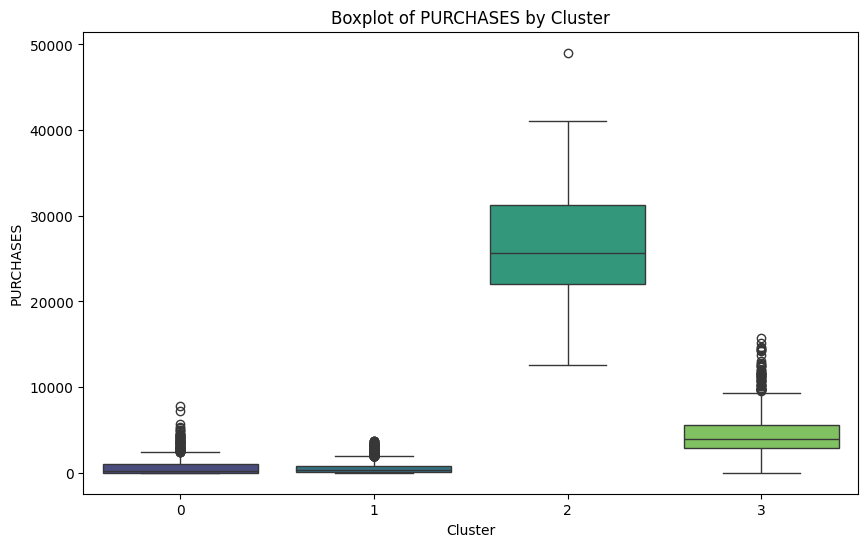

C:\Users\milto\AppData\Local\Temp\ipykernel_15532\2680238050.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


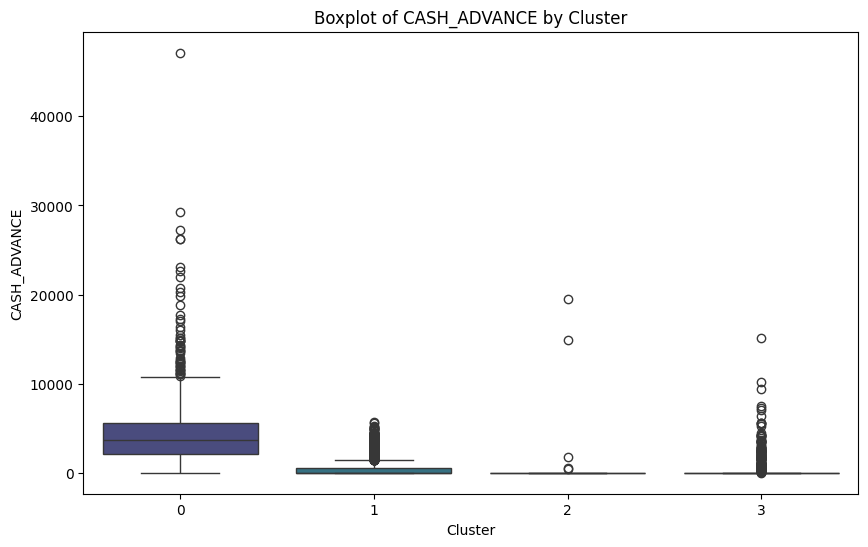

C:\Users\milto\AppData\Local\Temp\ipykernel_15532\2680238050.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


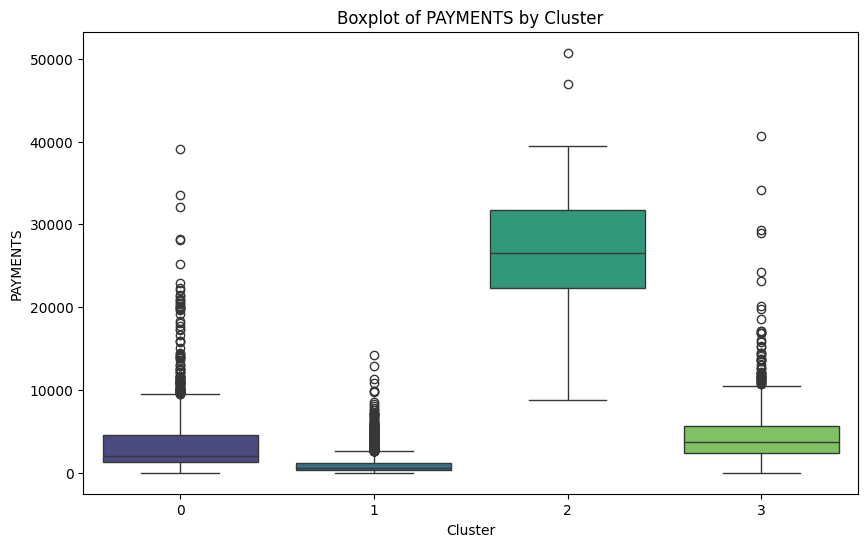

C:\Users\milto\AppData\Local\Temp\ipykernel_15532\2680238050.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')


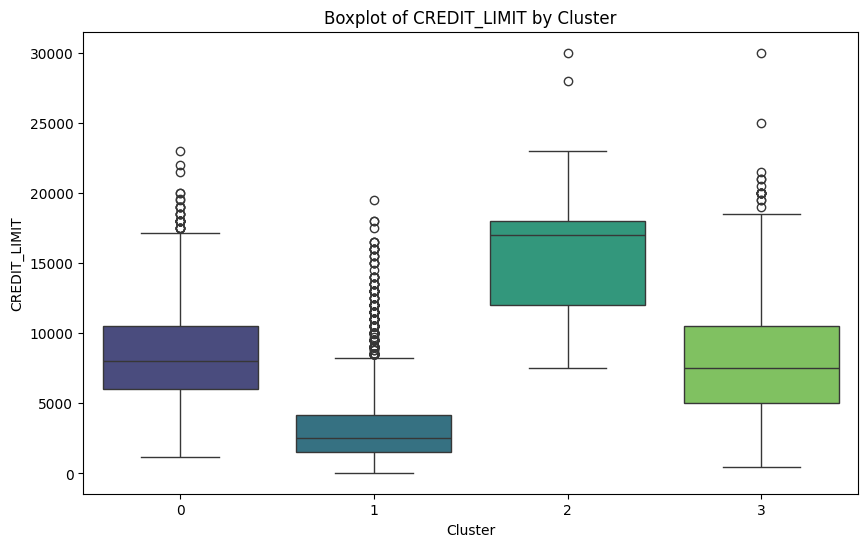

C:\Users\milto\AppData\Local\Temp\ipykernel_15532\2680238050.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


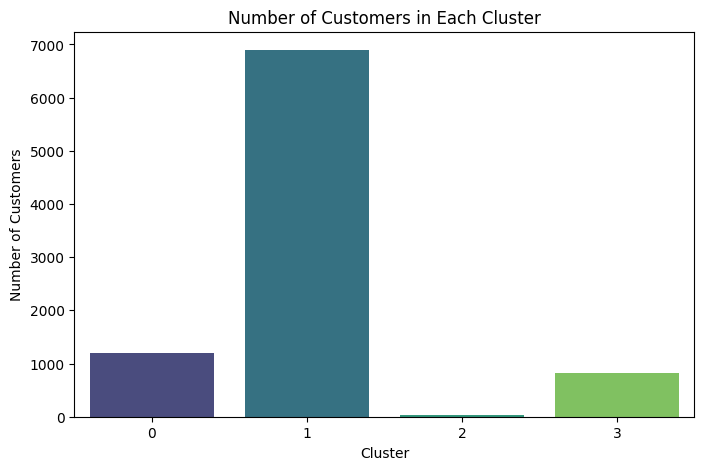

In [30]:
# 2.2 Visualize and Interpret Clusters

import seaborn as sns

# Add cluster assignments to the original dataframe for better visualization
df['Cluster'] = df_scaled['Cluster']

# Step 2.3: Visualize the clusters - Boxplot for each feature
features_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df, palette='viridis')
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

# Step 2.4: Countplot to see the number of customers in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
Step 8: Summary of Findings

    Reporting:
        Summarize your key insights in a clear format.
        Use visual aids, charts, and customer segments to support your findings.

Step 9: Recommendations and Next Steps

    Recommendations:
        Based on spending habits, suggest strategies that could benefit the bank or institution, like targeted marketing campaigns or improved credit offerings.
    Future Work:
        Suggest further steps, such as clustering to identify hidden patterns or using predictive models to anticipate customer actions.